# Rotacionais e Gradientes
## Nícolas André da Costa Morazotti

Podemos entender o que ocorre ao calcularmos o rotacional de um campo da
seguinte maneira: suponha um campo $\mathbf A = xy(\hat x+\hat y+\hat
z)$. Primeiramente, definimos o campo:

In [1]:
import numpy as np
from sympy import *
from sympy.physics.vector import ReferenceFrame, curl, divergence, gradient

S = ReferenceFrame('S')
A = (S[0]*S[1])*(S.x+S.y+S.z)
vars = [S[0],S[1],S[2]]
A

S_x*S_y*S.x + S_x*S_y*S.y + S_x*S_y*S.z

Veja que podemos calcular o rotacional de $\mathbf A$ referente ao
referencial $S$ com ``curl(A,S)``:
    

In [3]:
curl(A,S)

S_x*S.x - S_y*S.y + (-S_x + S_y)*S.z

Desejamos plotar o campo $\mathbf A$ e seu rotacional num plano $z=0$. 

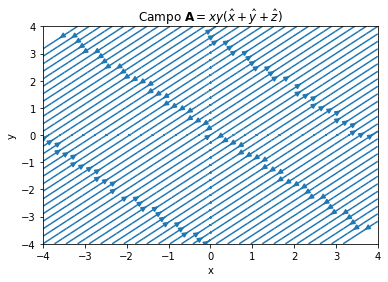

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(dpi=300)
%matplotlib Inline
X,Y = np.mgrid[-4:4:100j,-4:4:100j]
U = lambdify(vars,A.dot(S.x),modules='numpy')
V = lambdify(vars,A.dot(S.y),modules='numpy')
plt.streamplot(Y,X, U(X,Y,0), V(X,Y,0))
plt.title(r'Campo $\mathbf{A} = xy(\hat{x}+\hat{y}+\hat{z})$')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()

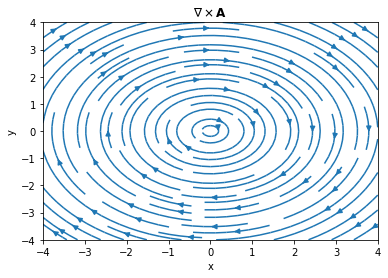

In [6]:
U = lambdify(vars,curl(A,S).dot(S.x),modules='numpy')
V = lambdify(vars,curl(A,S).dot(S.y),modules='numpy')
plt.streamplot(Y,X, U(X,Y,0), V(X,Y,0))
plt.title(r'$\nabla\times\mathbf{A}$')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()

Se tivéssemos definido o campo $\mathbf A$ como um gradiente de um campo
escalar $f=xy$,

In [8]:
f = S[0]*S[1]
A = gradient(f,S)
A

S_y*S.x + S_x*S.y

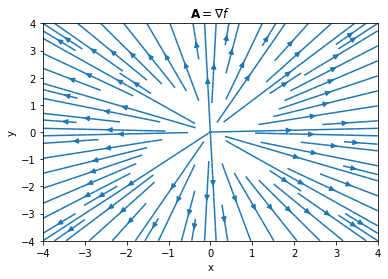

In [9]:
U = lambdify(vars,A.dot(S.x),modules='numpy')
V = lambdify(vars,A.dot(S.y),modules='numpy')
plt.streamplot(Y,X, U(X,Y,0), V(X,Y,0))
plt.title(r'$\mathbf{A}=\nabla f$')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()

De tal modo que $\nabla\times A=0$:

In [4]:
curl(A,S)

S_x*S.x - S_y*S.y + (-S_x + S_y)*S.z